In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation

In [3]:
x =   [[-0., -0.,  4., -4., -5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4., -5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]

x = np.array(x)
coords = x[3:6, :]
coords

array([[-0.,  4., -4., -5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [4]:
def min_jerk(x, target, t_max, t):
    t = t/t_max
    a = target - x
    b = 10*np.power(t,3) - 15*np.power(t,4) + 6*np.power(t,5)
    return np.tile(x, (len(t),1)).T + np.outer(a,b)

In [5]:
dt = 0.05                       # time step
dT = 1                          # time to reach target
n = int(dT/dt)                  # number of time steps between two targets
n_points = coords.shape[1]      # number of targets
times = np.linspace(0, dT, n)   # time array
N = n * (n_points-1)            # total number of time steps
T = (n_points-1)*dT             # total time

In [6]:
# save all trajectories in one array
t = 0
trajectories = np.zeros((3, N))
for i in range(n_points-1):
    trajectory = min_jerk(coords[:,i], coords[:,i+1], dT, times)
    trajectories[:,t:t+len(times)] = trajectory
    t += int(dT/dt)

In [14]:
trajectories[0].shape

(200,)

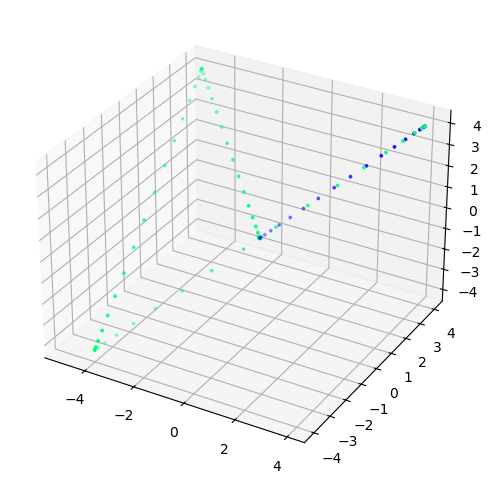

In [7]:
import matplotlib as mpl

# plot trajectories between all points
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
t = 0

colormap = mpl.colormaps['winter']

for i in range(n_points-1):
    trajectory = min_jerk(coords[:,i], coords[:,i+1], dT, times)
    ax.scatter(trajectory[0,:], trajectory[1,:], trajectory[2,:], s = 3, color=colormap(t/T))
    t += int(dT/dt)

MovieWriter ffmpeg unavailable; using Pillow instead.


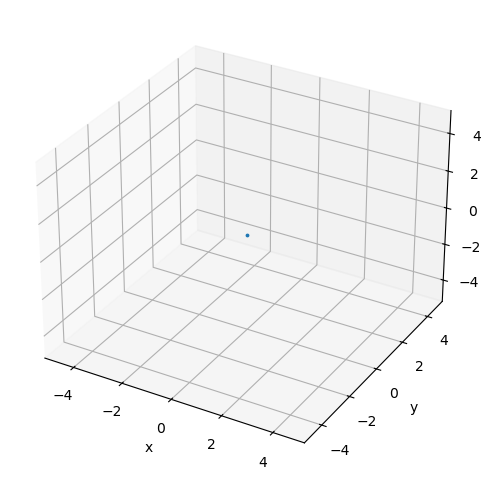

In [10]:
# animate trajectory
from matplotlib import animation

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

def animate(i):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5,5)
    ax.scatter(trajectories[0,i], trajectories[1,i], trajectories[2,i], s = 3, marker='o')
    return fig, ax 

anim = animation.FuncAnimation(fig, animate, frames=N, interval=50, blit=False)
anim.save("test.gif")
